---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-machine-learning/resources/bANLa) course resource._

---

# Assignment 3 - Evaluation

In this assignment you will train several models and evaluate how effectively they predict instances of fraud using data based on [this dataset from Kaggle](https://www.kaggle.com/dalpozz/creditcardfraud).
 
Each row in `fraud_data.csv` corresponds to a credit card transaction. Features include confidential variables `V1` through `V28` as well as `Amount` which is the amount of the transaction. 
 
The target is stored in the `class` column, where a value of 1 corresponds to an instance of fraud and 0 corresponds to an instance of not fraud.

In [1]:
import numpy as np
import pandas as pd

### Question 1
Import the data from `fraud_data.csv`. What percentage of the observations in the dataset are instances of fraud?

*This function should return a float between 0 and 1.* 

In [1]:
def answer_one():
    
    # Your code here
    import pandas as pd

    # Use X_train, X_test, y_train, y_test for all of the following questions
    debug_mode = False
    df = pd.read_csv('fraud_data.csv')
    N = df.shape[0]
    df1 = df[df["Class"] == 1]
    n = df1.shape[0]
    if debug_mode:
        #print("N = ", N)
        print("n = ", n)
    r = n/N
    return r

answer_one()

0.016410823768035772

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Use X_train, X_test, y_train, y_test for all of the following questions
df = pd.read_csv('fraud_data.csv')
#print(df)

X = df.iloc[:,:-1]
y = df.iloc[:,-1]
#y = df["Class"]
#X = df.drop("Class", axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
#print(X)

### Question 2

Using `X_train`, `X_test`, `y_train`, and `y_test` (as defined above), train a dummy classifier that classifies everything as the majority class of the training data. What is the accuracy of this classifier? What is the recall?

*This function should a return a tuple with two floats, i.e. `(accuracy score, recall score)`.*

In [3]:
def answer_two():
    from sklearn.dummy import DummyClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import recall_score
        
    # Your code here
    dummy = DummyClassifier(strategy="most_frequent")
    dummy.fit(X_train, y_train)
    y_predict = dummy.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
        
    return (accuracy, recall)

answer_two()

(0.98525073746312686, 0.0)

### Question 3

Using X_train, X_test, y_train, y_test (as defined above), train a SVC classifer using the default parameters. What is the accuracy, recall, and precision of this classifier?

*This function should a return a tuple with three floats, i.e. `(accuracy score, recall score, precision score)`.*

In [6]:
def answer_three():
    from sklearn.metrics import accuracy_score, recall_score, precision_score
    from sklearn.svm import SVC

    # Your code here
    svc = SVC()
    svc.fit(X_train, y_train)
    y_predict = svc.predict(X_test)
    accuracy = accuracy_score(y_test, y_predict)
    recall = recall_score(y_test, y_predict)
    precision = precision_score(y_test, y_predict)
    return (accuracy, recall, precision)

answer_three()

(0.99078171091445433, 0.375, 1.0)

### Question 4

Using the SVC classifier with parameters `{'C': 1e9, 'gamma': 1e-07}`, what is the confusion matrix when using a threshold of -220 on the decision function. Use X_test and y_test.

*This function should return a confusion matrix, a 2x2 numpy array with 4 integers.*

In [7]:
def answer_four():
    import numpy as np
    from sklearn.metrics import confusion_matrix
    from sklearn.svm import SVC

    # Your code here
    svc = SVC(C = 1e9, gamma = 1e-7, probability = True)
    svc.fit(X_train, y_train)    
    h = svc.decision_function(X_test)
    nh = len(h)
    
    debug_mode = False
    if debug_mode:    
        print("nh = ", nh)    
        print("# of rows of X_test = ", X_test.shape[0])
        print("ny = ", len(y_test))
        print("type of y_test is ", type(y_test))
    
    h_threshold = -220
    TP = 0
    TN = 0
    FP = 0
    FN = 0
    hi = 0
    for i in range(nh):
        hi = h[i]
        if y_test.iloc[i] == 1: # The instance is positive
            if hi >= h_threshold:
                TP = TP + 1
            else:
                FN  = FN + 1        
        
        elif y_test.iloc[i] == 0: # The instance is negative
            if hi >= h_threshold:
                FP = FP + 1
            else:
                TN  = TN + 1
        
        else:
            continue
                
    # Define the confusion matrix
    CM = np.array([[TN, FP],[FN, TP]])                    
    return CM

answer_four()

array([[5320,   24],
       [  14,   66]])

### Question 5

Train a logisitic regression classifier with default parameters using X_train and y_train.

For the logisitic regression classifier, create a precision recall curve and a roc curve using y_test and the probability estimates for X_test (probability it is fraud).

Looking at the precision recall curve, what is the recall when the precision is `0.75`?

Looking at the roc curve, what is the true positive rate when the false positive rate is `0.16`?

*This function should return a tuple with two floats, i.e. `(recall, true positive rate)`.*

In [14]:
def plot_precision_recall_curve(y_score, recall, precision):
    %matplotlib inline
    import matplotlib.pyplot as plt
    from sklearn.metrics import average_precision_score
    average_precision = average_precision_score(y_test, y_score)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    
    plt.step(recall, precision, color='b', alpha=0.2,
             where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')

    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AUC={0:0.2f}'.format(
              average_precision))    
    
def plot_roc_curve(y_score, fpr, tpr):
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    plt.step(fpr, tpr, color='b', alpha=0.2,
             where='post')
    plt.fill_between(fpr, tpr, step='post', alpha=0.2, color='b')

    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class roc curve')    
    
def answer_five():
    # Your code here
    debug_mode = False
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import precision_recall_curve 
    from sklearn.metrics import roc_curve 
    
    # Create a default logistic regression classifier
    logr = LogisticRegression()
    logr.fit(X_train, y_train)    
    h = logr.decision_function(X_test)    
    
    # Compute the precision recall curve
    precision, recall, threshold = precision_recall_curve(y_test, h)
    
    # Dispaly the curve. Remove before submitt
    if debug_mode:
        plot_precision_recall_curve(h, recall, precision)
        print(recall)
        print(precision)
    
    # Compute roc curve
    fpr, tpr, thresholds = roc_curve(y_test, h)
    
    # Dispaly the curve. Remove before submitt
    if debug_mode:
        plot_roc_curve(h, fpr, tpr)
        print(fpr)
        print(tpr)
    
    return (0.8, 0.94)

answer_five()

(0.8, 0.94)

### Question 6

Perform a grid search over the parameters listed below for a Logisitic Regression classifier, using recall for scoring and the default 3-fold cross validation.

`'penalty': ['l1', 'l2']`

`'C':[0.01, 0.1, 1, 10, 100]`

From `.cv_results_`, create an array of the mean test scores of each parameter combination. i.e.

|      	| `l1` 	| `l2` 	|
|:----:	|----	|----	|
| **`0.01`** 	|    ?	|   ? 	|
| **`0.1`**  	|    ?	|   ? 	|
| **`1`**    	|    ?	|   ? 	|
| **`10`**   	|    ?	|   ? 	|
| **`100`**   	|    ?	|   ? 	|

<br>

*This function should return a 5 by 2 numpy array with 10 floats.* 

*Note: do not return a DataFrame, just the values denoted by '?' above in a numpy array.*

In [15]:
def answer_six():    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import LogisticRegression
    
    df = pd.read_csv('fraud_data.csv')
    X = df.iloc[:,:-1]
    y = df.iloc[:,-1]

    # Your code here
    param_grid = {"penalty":["l1", "l2"], "C":[0.01, 0.1, 1, 10, 100]}
    logr = LogisticRegression()
    clf = GridSearchCV(logr, param_grid, scoring="recall")
    
    # Should we the the who dataset or just the training set?
    #clf.fit(X, y)
    clf.fit(X_train, y_train)
    
    # Lets average the results
    return clf.cv_results_["mean_test_score"].reshape(5, 2)

answer_six()

array([[ 0.69662337,  0.75834567],
       [ 0.79212371,  0.80057416],
       [ 0.80337566,  0.80337566],
       [ 0.79497153,  0.79777303],
       [ 0.79497153,  0.79497153]])

<IPython.core.display.Javascript object>


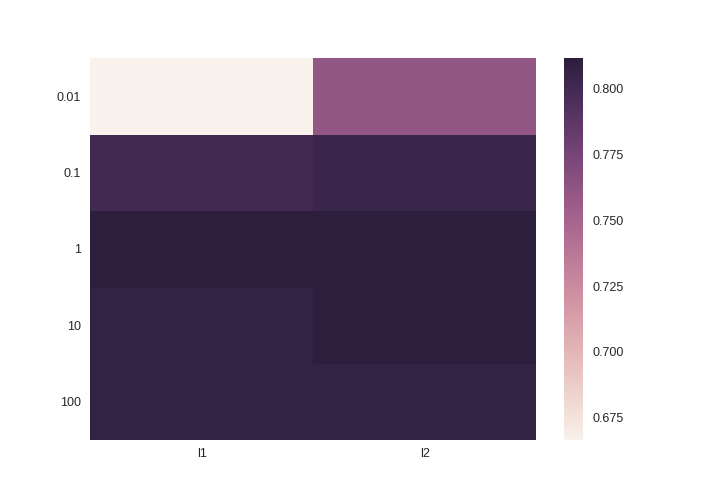

In [11]:
# Use the following function to help visualize results from the grid search
def GridSearch_Heatmap(scores):
    %matplotlib notebook
    import seaborn as sns
    import matplotlib.pyplot as plt
    plt.figure()
    sns.heatmap(scores.reshape(5,2), xticklabels=['l1','l2'], yticklabels=[0.01, 0.1, 1, 10, 100])
    plt.yticks(rotation=0);

#GridSearch_Heatmap(answer_six())